# <u>Project</u> : <u>Natural Image Scene Classification</u>
-Yogesh Kumar (17001011064)<br>

### This Program uses Convolutional Neural Network (CNN) for Multiclass Classification on the Image Dataset of Natural Scenes around the world which is published by Intel

In [1]:
import os
import cv2
from sklearn.utils import shuffle

### Function to load Images and its Labels 

In [2]:
def get_images(directory):
    Images = []
    Labels = [] 
    # 0 : Building , 1 : forest, 2 : glacier, 3 : mountain, 4 : Sea , 5 : Street
    label = 0
    for labels in os.listdir(directory): 
        if labels == 'glacier':
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        for image_file in os.listdir(directory+labels):
            image = cv2.imread(directory+labels+r'/'+image_file) 
            image = cv2.resize(image,(150,150))
            Images.append(image)
            Labels.append(label)
    return shuffle(Images,Labels)

In [3]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    return labels[class_code]

# <u>Image Dataset of Natural Scenes around the World</u>
### This Data contains around 25k images of size 150x150 distributed under 6 categories
### 0  :  'Buildings' 
### 1  :  'Forest'  
### 2  :  'Glacier'  
### 3  :  'Mountain'  
### 4  :  'Sea'  
### 5  :  'Street'
### There are around 14k images in Train, 3k in Test and 7k in Prediction
### This Data was initially published by Intel to host a Image classification Challenge

## Load the Images and Labels from Training Dataset

In [6]:
Images, Labels = get_images("C:/Users/yoges/Downloads/Natural_Scene/seg_train/seg_train/")

### Convert List to NumPy Array

In [7]:
import numpy as np
Images = np.array(Images)
Labels = np.array(Labels)

In [8]:
print(Images.shape)
print(Labels.shape)

(14034, 150, 150, 3)
(14034,)


### Some Images with their Lables from Training Dataset

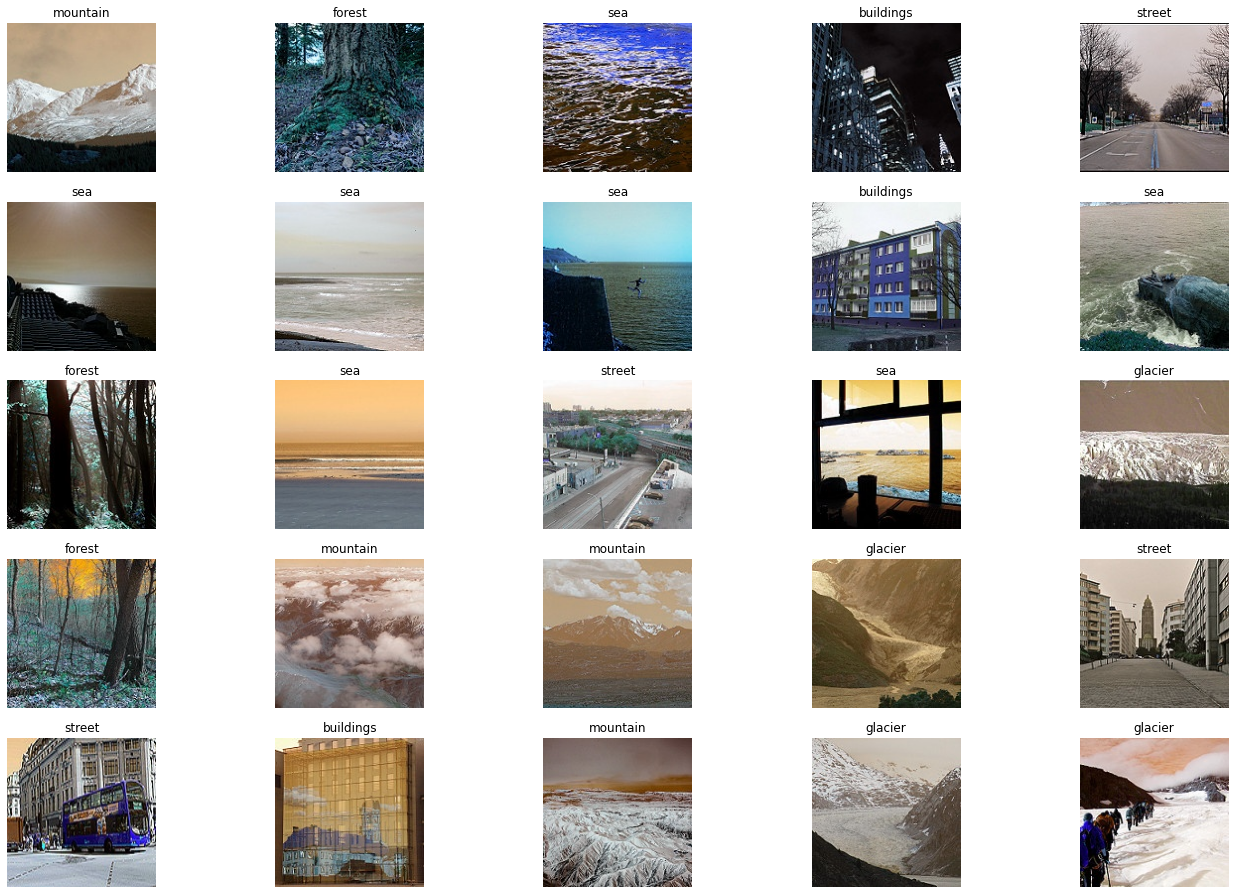

In [9]:
import matplotlib.pyplot as plt
from random import randint
fig,axes = plt.subplots(5,5) 
fig.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rand_number = randint(0,len(Images))
        axes[i,j].imshow(Images[rand_number])
        axes[i,j].set_title(get_classlabel(Labels[rand_number]))
        axes[i,j].axis('off')

# <u>CNN MODEL</u>

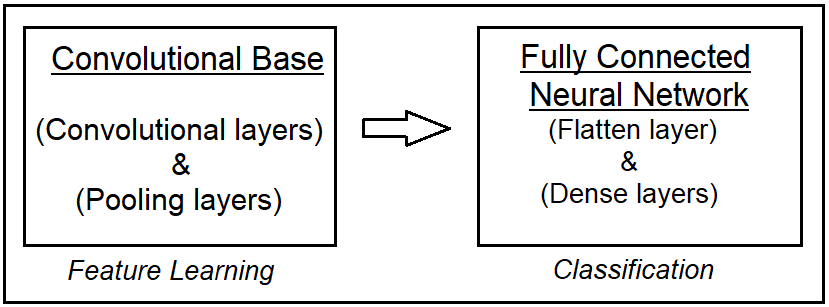

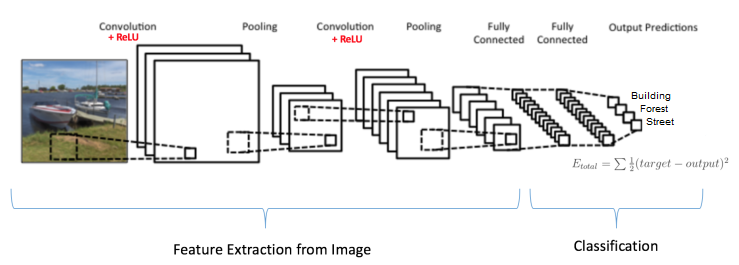

## Transfer Learning from VGG16

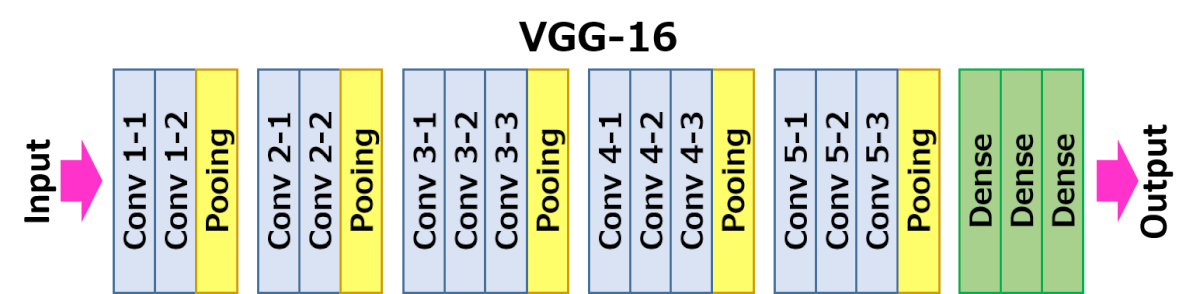

In [4]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
conv_base.summary()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
____________________________________________________

## Model Architecture (VGG16 as Conv. Base)

In [5]:
model=keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(6,activation='softmax'))

In [6]:
conv_base.trainable=False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 2,098,950
Non-trainable params: 14,714,688
_________________________________________________________________


## Compile and Train the model

In [13]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.RMSprop(learning_rate = 0.001),metrics=["accuracy"])
model_history= model.fit(Images,Labels,epochs=2,validation_split=0.30)

Epoch 1/2
307/307 [==============================] - 1887s 6s/step - loss: 1.6649 - accuracy: 0.8490 - val_loss: 0.5603 - val_accuracy: 0.8931
Epoch 2/2
307/307 [==============================] - 1899s 6s/step - loss: 0.4337 - accuracy: 0.9122 - val_loss: 1.0085 - val_accuracy: 0.8803


In [14]:
model.save("Project_Model_VGG16.h5")

In [7]:
model=keras.models.load_model("C:/Users/yoges/Downloads/Natural_Scene/Project_Model_VGG16.h5")

### Visualize the Models Accuracy and Model Loss

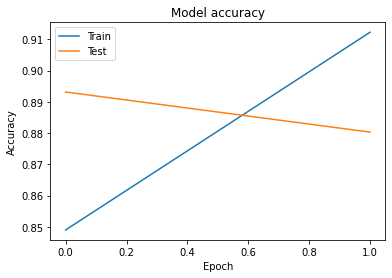

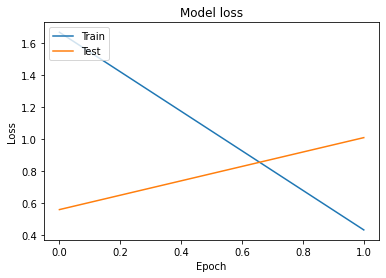

In [15]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Accuracy increases and Loss decreases with increase in the epoch value

## Evaluation Performance of Model on Testing Dataset

In [17]:
test_images,test_labels = get_images("C:/Users/yoges/Downloads/Natural_Scene/seg_test/seg_test/")
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

94/94 [==============================] - 389s 4s/step - loss: 1.0750 - accuracy: 0.8787


[1.0750234127044678, 0.8786666393280029]

### Our model has an accuracy of ~88 % on Testing Dataset. Which can be further increased by playing around with different parameters such as
1. Increasing number of Neurons
2. Increasing number of hidden layers
3. Increasing epochs
4. Playing around with convolutional layer parameters

## Prediction of Class on Images

In [13]:
pred_images,No_labels = get_images("C:/Users/yoges/Downloads/Natural_Scene/seg_pred/")
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

c:\users\yoges\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


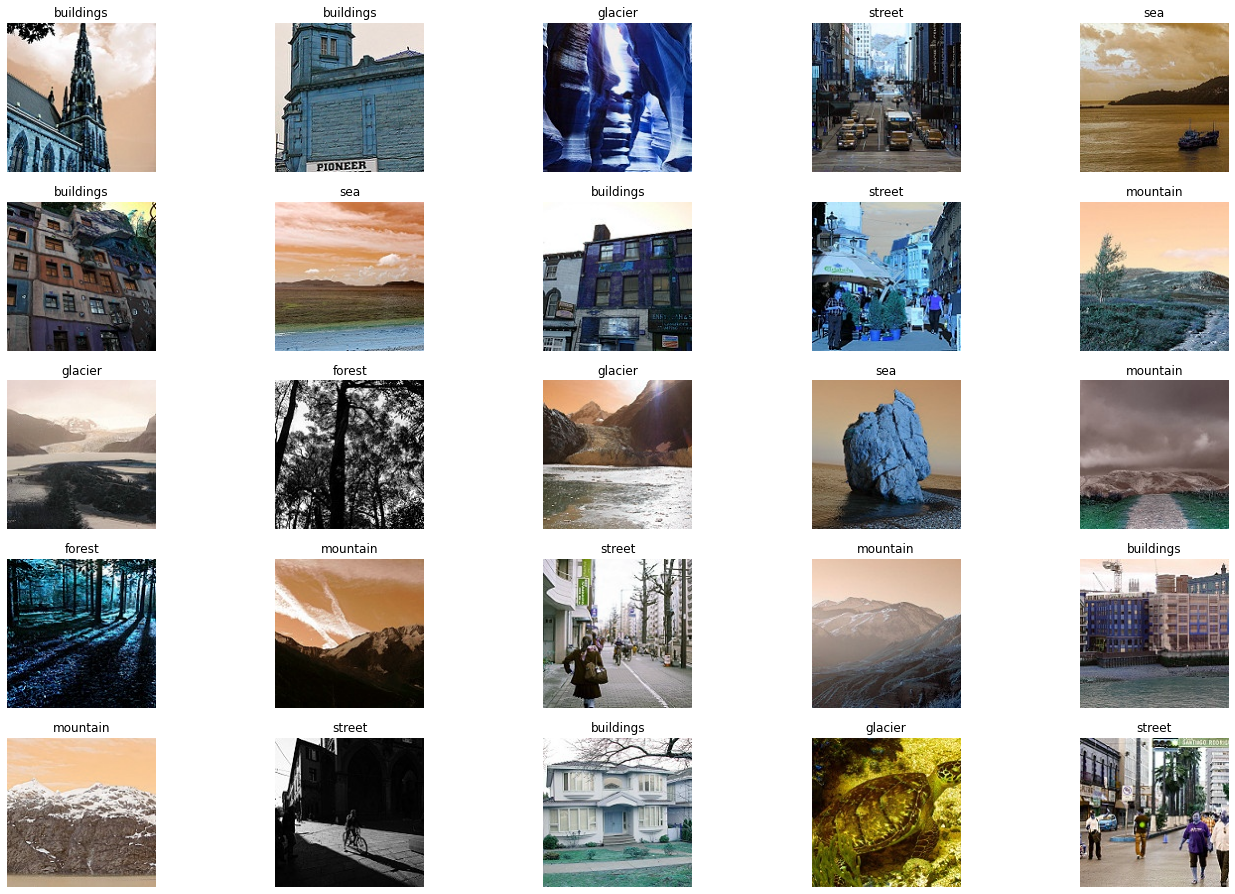

In [14]:
import matplotlib.pyplot as plt
from random import randint
fig,axes = plt.subplots(5,5) 
fig.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rand_number = randint(0,len(pred_images))
        img=pred_images[rand_number]
        axes[i,j].imshow(img)
        img = np.expand_dims(img,axis=0)
        label=get_classlabel(model.predict_classes(img)[0])
        axes[i,j].set_title(label)
        axes[i,j].axis('off')

(-0.5, 149.5, 149.5, -0.5)

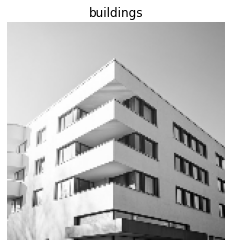

In [20]:
path ='C:/Users/yoges/Downloads/photo_building.jpg'
img=cv2.imread(path)
img=cv2.resize(img,(150,150))
img=np.array(img)
plt.imshow(img)
img = np.expand_dims(img,axis=0)
plt.title(get_classlabel(model.predict_classes(img)[0]))
plt.axis('off')

# Model Classify the Images Correctly....

# Thank you !!!